# gpOptimizer: Mini Application

In [1]:
## First, install the right version of gpCAM
#!pip install gpcam==8.3.0

## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from gpcam import GPOptimizer
import time

In [3]:
from itertools import product
x_pred1D = np.linspace(0,1,1000).reshape(-1,1)

## Data Prep

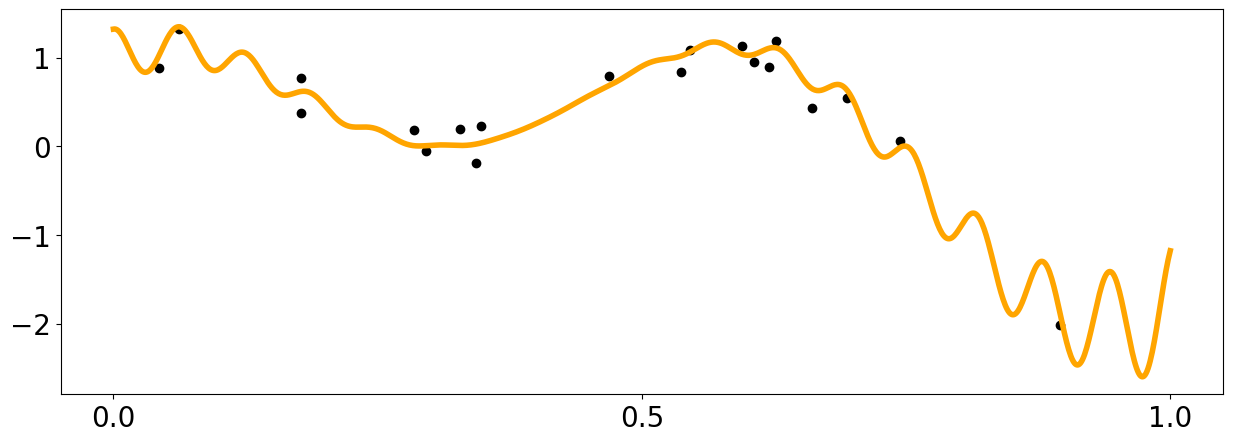

In [4]:
x = np.linspace(0,600,1000)
def f1(x):
    return np.sin(5. * x) + np.cos(10. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)
 
x_data = np.random.rand(20).reshape(-1,1) 
y_data = f1(x_data[:,0]) + (np.random.rand(len(x_data))-0.5) * 0.5

plt.figure(figsize = (15,5))
plt.xticks([0.,0.5,1.0])
plt.yticks([-2,-1,0.,1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x_pred1D,f1(x_pred1D), color = 'orange', linewidth = 4)
plt.scatter(x_data[:,0],y_data, color = 'black')

## GP Setup

In [6]:
my_gp = GPOptimizer(x_data,y_data,)
my_gp.train()

train_at = [10,20,30] #optional
for i in range(100):
    new = my_gp.ask(np.array([[0.,1.]]))["x"]
    my_gp.tell(new, f1(new).reshape(len(new)))
    if i in train_at: my_gp.train()

0.06258645692827455
(np.float64(0.0339088620890729), np.float64(0.04077037849853874))


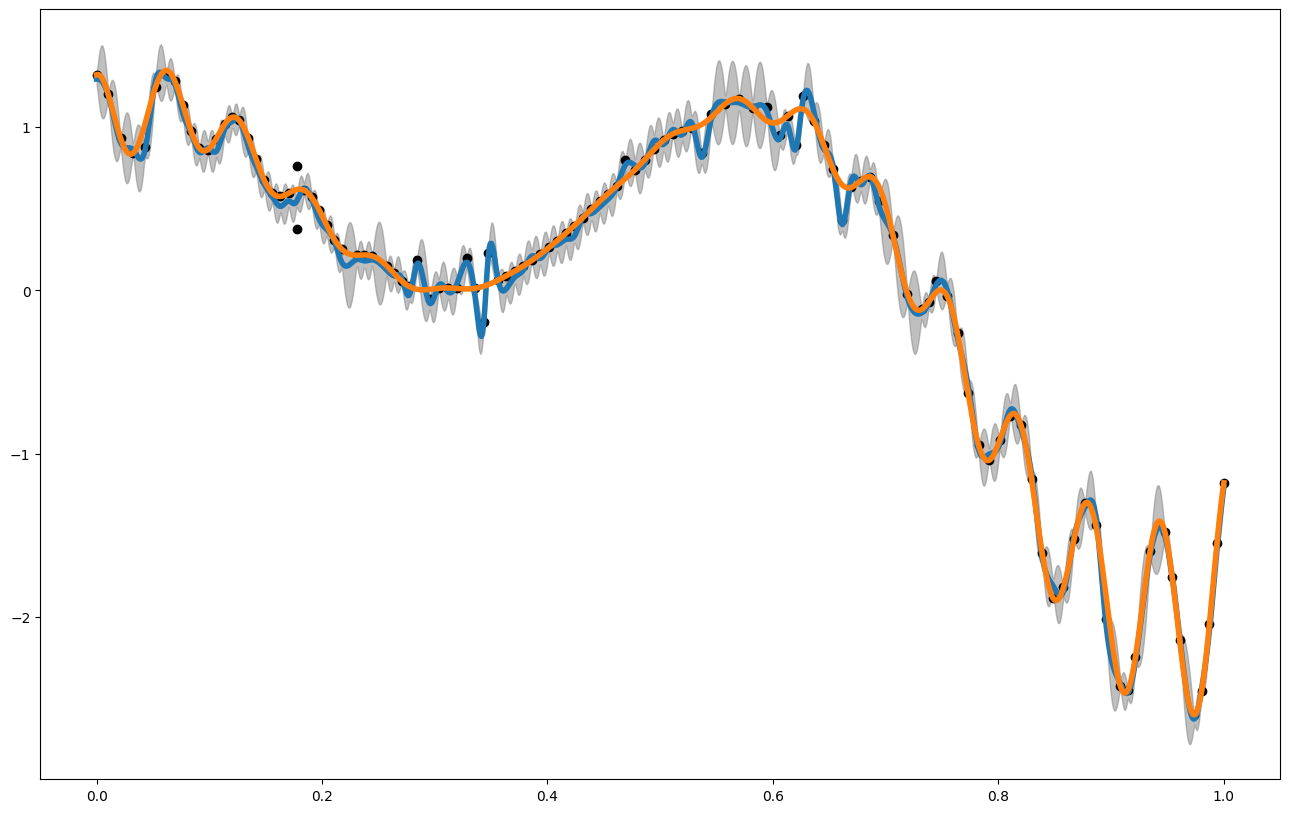

In [8]:
#let's make a prediction
x_pred = np.linspace(0,1,1000)

mean1 = my_gp.posterior_mean(x_pred.reshape(-1,1))["m(x)"]
var1 =  my_gp.posterior_covariance(x_pred.reshape(-1,1), variance_only=False, add_noise=True)["v(x)"]
plt.figure(figsize = (16,10))
plt.plot(x_pred,mean1, label = "posterior mean", linewidth = 4)
plt.plot(x_pred1D,f1(x_pred1D), label = "latent function", linewidth = 4)
plt.fill_between(x_pred, mean1 - 3. * np.sqrt(var1), mean1 + 3. * np.sqrt(var1), alpha = 0.5, color = "grey", label = "var")
plt.scatter(my_gp.x_data,my_gp.y_data, color = 'black')


##looking at some validation metrics
print(my_gp.rmse(x_pred1D,f1(x_pred1D).flatten()))
print(my_gp.crps(x_pred1D,f1(x_pred1D).flatten()))